In [1]:
import numpy as np
import matplotlib.pylab as plt
import random as rn
import time
from scipy.spatial import ConvexHull
from matplotlib.patches import Rectangle
from matplotlib.path import Path
import shapely.geometry
import shapely.ops as so

In [3]:
def time_block_obstacle(pos_obs, time_obs, repeat_index):
    time_translate = repeat_index*(np.sum(time_obs))

    point1 = [pos_obs[0], time_obs[0]+time_translate]
    point2 = [pos_obs[1], time_obs[0]+time_translate]
    point3 = [pos_obs[1], time_obs[0]+time_obs[1]+time_translate]
    point4 = [pos_obs[0], time_obs[0]+time_obs[1]+time_translate]

    return shapely.geometry.Polygon([point1, point2, point3, point4])

Configuration Space A

In [11]:
# Position
x0 = 0
xf = 30
xobs = [[5, 7], [10, 11], [15, 16], [23, 25]]
prox = [2.5, 2.5] # [x, t]

# General RRT Settings
K = 1000
iter_max = 1000
tMax = 20
vmax = 2
max_time = 5
tf = 20

# Obstacle Setting
# [start, close, open]
obs1 = [0, 2.5, 2.5]
obs2 = [0, 4, 4]
obs3 = [0, 3, 3]
obs4 = [0, 8, 2.5]
obs_vec = [obs1, obs2, obs3, obs4]

Text(0, 0.5, 't')

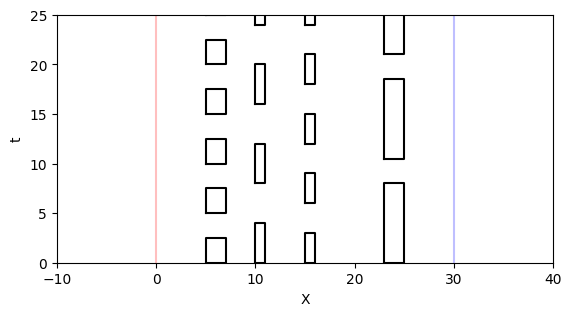

In [12]:
fig = plt.figure()
ax = fig.subplots()

# Obstacle
tspace = np.linspace(0, tf+5, 100)
for i in range(len(xobs)):
    obs_number = int(((tf+5)//np.sum(obs_vec[i]))+1)
    for j in range(obs_number):
        this_obstacle = time_block_obstacle(xobs[i], obs_vec[i], j)
        plt.plot(*this_obstacle.exterior.xy, 'k')

# Initial/Final
plt.plot([x0, x0], [0, tf+5], 'r-', alpha=0.25)
plt.plot([xf, xf], [0, tf+5], 'b-', alpha=0.25)

# Plot Limits
ax.axis('square')
plt.xlim(-10, 40)
plt.ylim(0, tf+5)
plt.xlabel('X')
plt.ylabel('t')

Configuration Space B

xobs:  [[1.198928104871747, 2.8957963805112463], [18.891251352738994, 20.82318772292915], [25.13000347750772, 26.25395027830463], [3.7356878017973347, 5.130688467885224], [11.733301458506238, 13.38304892165738], [10.813669781456358, 12.107829342920011]]
obs_vec:  [[0, 7.32055774028567, 2.67944225971433], [0, 8.365554423062276, 1.6344455769377237], [0, 6.5278658685643665, 3.4721341314356335], [0, 3.2779829401524174, 6.722017059847582], [0, 7.589851271623784, 2.4101487283762157], [0, 5.642641646419559, 4.357358353580441]]


Text(0, 0.5, 't')

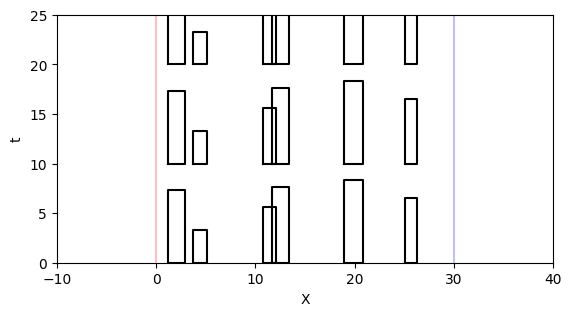

In [65]:
# Position
x0 = 0
xf = 30
num_obs = rn.randint(5, 10)
xobs_thickness = []
for i in range(num_obs):
    xobs_thickness.append(rn.uniform(0.5,2))
xobs = []
for i in range(num_obs):
    temp = rn.uniform(x0, xf)
    xobs.append([temp, temp+xobs_thickness[i]])
prox = [2.5, 2.5] # [x, t]

print('xobs: ', xobs)

# General RRT Settings
K = 1000
iter_max = 1000
tMax = 20
vmax = 2
max_time = 5

# Obstacle Setting
# [start, close, open]
obs_vec = []
max_period = 10
for i in range(num_obs):
    temp = rn.uniform(0, max_period)
    obs_vec.append([0, temp, max_period-temp])
print('obs_vec: ', obs_vec)

fig = plt.figure()
ax = fig.subplots()

# Obstacle
tspace = np.linspace(0, tf+5, 100)
for i in range(len(xobs)):
    obs_number = int(((tf+5)//np.sum(obs_vec[i]))+1)
    for j in range(obs_number):
        this_obstacle = time_block_obstacle(xobs[i], obs_vec[i], j)
        plt.plot(*this_obstacle.exterior.xy, 'k')

# Initial/Final
plt.plot([x0, x0], [0, tf+5], 'r-', alpha=0.25)
plt.plot([xf, xf], [0, tf+5], 'b-', alpha=0.25)

# Plot Limits
ax.axis('square')
plt.xlim(x0-10, xf+10)
plt.ylim(0, tf+5)
plt.xlabel('X')
plt.ylabel('t')